# Die Gausssche Normalverteilung

## Approximation der Binomialverteilung

Betrachten wir eine Folge von Bernoulli-verteilten Zufallsvariablen $X_i$ mit gleichem Parameter $p$ und $S_n := \sum_{i=1}^n X_i$ die Summe über die ersten $n$ davon, so wissen wir bereits, dass $S_n \sim Bin(n,p)$, also dass diese Summe Binomialverteilt ist.

Für die konkreten Werte $n=100,\ p=0.4$ sieht ein Histogramm von $100000$ Samples etwa so aus:

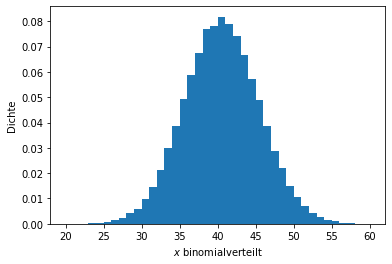

In [1]:
import numpy as np
from scipy.stats import binom, norm
from matplotlib import pyplot as plt
np.random.seed(123123)
binom_samples = binom.rvs(n=100,
                          p=0.4,
                          size=100000)
plt.hist(binom_samples, bins=40, density=True)
plt.xlabel("$x$ binomialverteilt")
plt.ylabel("Dichte")
plt.show()

Da diese Form für große Stichproben stets so aussieht, unabhängig von $p$ (probieren Sie das aus!), könnte man sich vorstellen, dass die Verteilung sich approximieren lässt mit Hilfe einer Funktion, die leichter zu berechnen ist als Binomialkoeffizienten.

Tatsächlich gibt es zur Approximation von Binomialkoeffizienten auch die *Stirling-Formel*

$$
n! \approx \sqrt{2\pi n} {\left(\frac{n}{e}\right)}^n
$$

Damit lässt sich nun (auch wenn es nicht ganz einfach ist) eine Approximation zeigen:

$$
P(S_n = k) \sim
\frac{1}{\sqrt{np(1-p)}} \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}} \quad \text{ fuer } n \to \infty
$$

wobei für $x$ auf der rechten Seite die Folge $x=x_n$ mit
$x_n = x_n(k) = \frac{k-np}{\sqrt{np(1-p)}}$ eingesetzt werden muss. Das Symbol $\sim$ bedeutet: asymptotisch gleich, d.h. der Quotient konvergiert gegen $1$.

Diese Approximation ist insofern hilfreich, als dass wir nun die Funktion $e^{-\frac{x^2}{2}}$ tabellieren können und konkrete Werte für gewisse $n,p$ ablesen können. Das ist wesentlich effizienter, als Binomialkoeffizienten auszurechnen. Die ganze Beobachtung heißt auch **Satz** von deMoivre-Laplace und soll uns zunächst als Motivation dienen, die Funktion $e^{-\frac{x^2}{2}}$ näher zu untersuchen.

## Ein Integral

Um aus der Funktion $e^{-\frac{x^2}{2}}$ eine Wahrscheinlichkeitsdichte zu machen, muss das Integral $1$ ergeben. Wir berechnen, weil es danach sehr nützlich wird, gleich ein etwas allgemeineres Integral:

:::{admonition} Lemma
Sei $v \in \mathbb{R}$ und $v > 0$. Dann gilt

$$
\int_{-\infty}^\infty e^{-\frac{x^2}{2v}} dx = \sqrt{2\pi v}.
$$
:::

:::{admonition} Beweis
Da auf der rechten Seite eine Quadratwurzel steht, bietet es sich an, beide Seiten der Gleichung zu quadrieren. Wir formen die linke Seite dann weiter um, bis wir ein Integral über $\mathbb{R}^2$ in Polarkoordinaten transformieren können und dann leicht Stammfunktionen bestimmen können:

$$
  & {\left( \int_{-\infty}^\infty e^{-\frac{x^2}{2v}} dx \right)}^2 \\
 =& {\left( \int_{-\infty}^\infty e^{-\frac{x^2}{2v}} dx \right)}{\left( \int_{-\infty}^\infty e^{-\frac{y^2}{2v}} dy \right)} \\
 =& \int_{-\infty}^\infty e^{-\frac{x^2}{2v}} {\left( \int_{-\infty}^\infty e^{-\frac{y^2}{2v}} dy \right)} dx \\
 =& \int_{-\infty}^\infty {\left( \int_{-\infty}^\infty e^{-\frac{x^2}{2v}} e^{-\frac{y^2}{2v}} dy \right)} dx \\
 =& \int_{-\infty}^\infty {\left( \int_{-\infty}^\infty e^{-\frac{x^2+y^2}{2v}} dy \right)} dx \\
 =& \int_{\mathbb{R}^2} e^{-\frac{x^2+y^2}{2v}} d(x,y) \\
 =& \int_{0}^\infty \int_{0}^{2\pi} r e^{-\frac{r^2}{2v}} d\phi dr \\
 =& \int_{0}^\infty {\left[  r e^{-\frac{r^2}{2v}} \phi \right]}_{\phi=0}^{\phi=2\pi} dr \\
 =& \int_{0}^\infty r e^{-\frac{r^2}{2v}} 2\pi dr \\
 =& -2\pi \int_{0}^{-\infty} r e^{-\frac{r^2}{2v}} dr \\
 =& 2\pi v \int_{-\infty}^{0} e^u du \\
 =& 2\pi v {\left[ e^u \right]}_{-\infty}^{0} \\
 =& 2\pi v 
$$
:::

Da Integrale in der Statistik häufiger vorkommen, ist es nicht ganz verkehrt, sich bei dieser Rechnung klar zu machen, was genau warum in jedem Schritt passiert.

## Die eindimensionale Normalverteilung

:::{admonition} Definition
Seien $\mu,\sigma \in \mathbb{R}$ mit $\sigma > 0$. Dann heißt die Verteilung mit Dichtefunktion

$$
\phi(x) = \phi(x,\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

*Normalverteilung* und wir schreiben für eine reelle Zufallsvariable $X$ mit dieser Verteilung auch $X \sim \mathcal{N}(\mu,\sigma^2)$.
:::

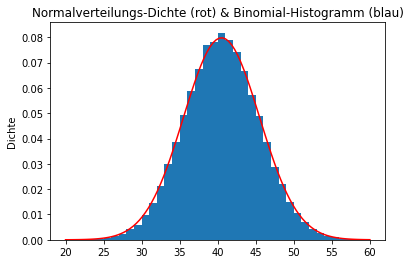

In [2]:
x = np.linspace(20,60,100)
plt.hist(binom_samples, bins=40, density=True)
plt.plot(x, norm(loc=40.5, scale=5).pdf(x), color="red")
plt.ylabel('Dichte')
plt.title('Normalverteilungs-Dichte (rot) & Binomial-Histogramm (blau)')
plt.show()

:::{admonition} Proposition
Wenn $X \sim \mathcal{N}(\mu,\sigma^2)$, so ist $\mathbb{E}(X) = \mu$ und $\mathbb{V}(X) = \sigma^2$.
:::

:::{admonition} Beweis
Wir setzen die Dichte für $X$ in die Formel für $\mathbb{E}(X)$ ein und transformieren das Integral über $x$ in ein Integral über $x + \mu$:

$$
\mathbb{E}(X) &= \int_{-\infty}^{\infty} x\phi(x) dx \\
              &=  \int_{-\infty}^{\infty} x \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} dx \\
              &= \frac{1}{\sigma\sqrt{2\pi}} \int_{-\infty}^{\infty} x e^{-\frac{(x-\mu)^2}{2\sigma^2}} dx \\
              &= \frac{1}{\sigma\sqrt{2\pi}} \int_{-\infty}^{\infty} (x+\mu) e^{-\frac{x^2}{2\sigma^2}} dx \\
              &= \frac{1}{\sigma\sqrt{2\pi}} \left( \left( \int_{-\infty}^{\infty} x e^{-\frac{x^2}{2\sigma^2}} dx \right) + \mu \left( \int_{-\infty}^{\infty} e^{-\frac{x^2}{2\sigma^2}} dx \right) \right) \\
              &= \frac{1}{\sigma\sqrt{2\pi}} \left( \left( \int_{-\infty}^{\infty} x e^{-\frac{x^2}{2\sigma^2}} dx \right) + \mu \sigma\sqrt{2\pi} \right) \\
              &= \mu + \frac{1}{\sigma\sqrt{2\pi}} \left( \int_{-\infty}^{\infty} x e^{-\frac{x^2}{2\sigma^2}} dx \right) = \mu\\
$$

Der Ausdruck nach dem $\mu +$ ist einfach $0$, denn die Funktion ist punktsymmetrisch um $0$ (der Faktor $x$ ist offensichtlich eine ungerade Funktion, der andere Faktor hängt nur von $|x|$ ab).

Genau so kann man bei der Varianz verfahren, indem man diesen Ausdruck vereinfacht:

$$
\mathbb{V}(X) &= \int_{-\infty}^{\infty} x^2\phi(x) dx  - {\left( \mathbb{E}(X) \right)}^2 \\
              &= \int_{-\infty}^{\infty} x^2\frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} dx - \mu^2
$$
:::

:::{admonition} Definition
Man nennt eine Zufallsvariable mit $X \sim \mathcal{N}(0,1)$ auch *standardnormalverteilt*
:::

:::{admonition} Proposition
Wenn $X \sim \mathcal{N}(\mu,\sigma^2)$, so ist $\frac{X - \mu}{\sigma} \sim \mathcal{N}(0,1)$.
:::


:::{admonition} Beweis
**Idee:**
Es ist sofort klar, dass $\mathbb{E}(X-\mu) = 0$ und dass $\mathbb{V}\left(\frac{X-\mu}{\sigma}\right) = 1$.
Weniger klar ist, dass die neue Zufallsvariable tatsächlich normalverteilt ist. Das lässt sich z.B. mit der  Momenterzeugendenfunktion beweisen.
:::

Alternativ nutzen wir, dass die Summe von unabhängigen Zufallsvariablen mit Dichten $f,g$ selbst wieder eine Dichte hat, nämlich die *Faltung* $f \ast g$. Anstatt das nun rigoros einzuführen und zu beweisen, benutzen wir es ein weiteres Mal, damit lässt sich nämlich zeigen:

:::{admonition} Proposition
Wenn $X \sim \mathcal{N}(\mu_1,\sigma_1^2)$ und $Y \sim \mathcal{N}(\mu_2,\sigma_2^2)$,
so ist $X+Y \sim \mathcal{N}(\mu_1 + \mu_2,\sigma_1^2 + \sigma_2^2)$.
:::

:::{admonition} Satz
Unter allen Verteilungen reeller Zufallsvariablen $X$ mit festem Erwartungswert $\mu = \mathbb{E}(X)$ und Varianz $\sigma^2 = \mathbb{V}(X)$ ist die Normalverteilung diejenige mit der maximalen Entropie.
:::

Um diesen Satz überhaupt präzise formulieren zu können, benötigen wir einen Entropiebegriff für stetige Verteilungen. Anstatt das jetzt zu tun, wollen wir uns später damit beschäftigen, wenn wir auch relative Entropie, die stetige Version davon und Likelihood diskutieren.

Wichtig ist aber die Take-Home-Message des Satzes: Wenn über eine stetige Verteilung reeller Zahlen außer Erwartungswert und Varianz nichts bekannt ist, dann ist die entprechende Normalverteilung die vernünftigste Annahme. In diesem Sinne ist die Normalverteilung ein guter stetiger Ersatz für die diskrete Gleichverteilung, aber nun auf ganz $\mathbb{R}$ (die Normalverteilung hat Träger $\mathbb{R}$).

# Der zentrale Grenzwertsatz

:::{admonition} Satz
Wenn $X_i$ eine Folge von identisch verteilten, voneinander unabhängigen (iid = independent identically distributed) Zufallsvariablen mit Erwartungswert $\mathbb{E}(X_i)=0$ und Varianz $\mathbb{V}(X_i)=\sigma^2$ ist,
und wir die skalierte Summe $S_N := \dfrac{1}{\sigma\sqrt{N}} \sum_{i=1}^N X_i$ (mit $\mathbb{E}(S_N)=0$ und $\mathbb{V}(S_N)=1$) betrachten, dann gilt die Konvergenz in Verteilung:

$$
S_N \xrightarrow{N \to \infty} \mathcal{N}(0,1)
$$
:::

Konvergenz in Verteilung heißt, dass die Verteilungsfunktion von $S_N$ gegen die Verteilungsfunktion einer Standardnormalverteilung konvergiert.

Von diesem Satz gibt es auch Abschwächungen, die gewisse Abhängigkeiten zwischen den $X_i$ erlauben.

:::{admonition} Bemerkung
Wichtig ist der Satz für uns, weil er erlaubt eine Summe unabhängiger Zufallsvariablen mit einer Normalverteilung zu approximieren. Das tritt in der Praxis häufig auf, wenn man Messungen an physikalischen oder technosozialen Systemen vornimmt, die in der Regel von einer langen Liste weitgehend unabhängiger Störeinflüsse beeinträchtigt werden. Diese Summe an Fehlerquellen ist (für eine hinreichend große Zahl an unabhängigen Fehlerquellen) etwa normalverteilt.
:::

Um zwei konkrete Beispiele zu nennen: der Fehler bei der Ortsbestimmung mit GNSS-Systemen wie GPS ist normalverteilt (auch wenn die atmosphärischen Störungen, die den Wert ungenauer machen, nicht normalverteilt sind). Bei der industriellen Fertigung von Bauteilen gibt es ebenfalls im gesamten Produktionsprozess Fehlerquellen, die am Ende zu einer Normalverteilung aufsummieren - deren Varianz man hinreichend klein halten muss, damit das Bauteil seine Aufgabe erfüllen kann. So darf ein Legostein nicht zu stark von einem baugleichen Legostein abweichen, sonst hält das Bauwerk hinterher nicht richtig.

Man kann außerdem die Geschwindigkeit der Konvergenz abschätzen, und damit in Erfahrung bringen, wie gut die Approximation durch eine Normalverteilung ist:

:::{admonition} Satz
Es existiert eine Konstante $C > 0,4409$ mit der folgenden Eigenschaft:

Wenn $X_i$ eine Folge von iid Zufallsvariablen mit Erwartungswert $0$ und Varianz $\sigma^2$ ist, und außerdem die dritten absoluten Momente $\mathbb{E}|X_i^3| = \rho < \infty$ existieren,
wir $F_N$ für die kumulative Verteilungsfunktion von $\frac{1}{\sigma\sqrt{N}} \sum_{i=1}^N X_i$ schreiben und $\Phi$ für die kumulative Verteilungsfunktion der Standardnormalverteilung $\mathcal{N}(0,1)$, so gilt für alle $x$ und alle $N$:

$$
\left| F_n(x) - \Phi(x) \right| \ \leq\ \dfrac{C\rho}{\sigma^3 \sqrt{n}}.
$$
:::

Für konkret bekannte $\sigma,\rho$ können wir also stets das $n$ bestimmen, um die linke Seite beliebig klein abzuschätzen. Mit anderen Worten: es lässt sich zu jeder gewünschten Genauigkeit berechnen, wie viele der iid Zufallsvariablen man (skaliert) aufaddieren muss, um es mit einer Standardnormalverteilung zu approximieren.

Klar: Wenn der Erwartungswert nicht $0$ ist, lässt sich eine Variante als Korollar beweisen (wie auch beim zentralen Grenzwertsatz), sodass die Konvergenz gegen $\mathcal{N}(\mu,1)$ geht. Wenn man anders reskaliert, auch gegen $\mathcal{N}(\mu,\sigma^2)$. In der Praxis sieht es eher so aus, dass man alle unbekannten Fehlerterme mit einer Normalverteilung modelliert, deren Erwartungswert und Varianz man empirisch schätzt.
